# Zillow Clustering Project

#### Robert Murphy

#### June 22 2021
_________________________________

------------------------------------

## Project Planning:

### - Create a README.md which contains a data dictionary, project objectives, business goals, initial hypothesis.
### - Acquire Zillow dataset from the Codeup databse, create a function which will use a sql query and pull specific tables save this function in a acquire.py
### - Prep the Zillow dataset.
### - Investigate missing values and outliers come to a conclusion to either drop or fill these values.
### - Explore the dataset on unscaled data, look into the interaction between independent variables and the target variable using visualization and statistical testing.
### - Clustering utilized to explore the data.
### - Four different models are to be created and compare performance. One model will have the distinct combination of algorithm, hyperparameters, and features.
### - Evaluate the models on the scaled train and validate datasets.
### - Choose the model which performs the best, then run that model on the test dataset.
### - Present conclusions and main takeaways.

------------

## Project Goal:

### -  Find drivers of errors in the Zestimate.

### -  Construct a model that accurately predicts log error.

### -  Document your process well enough to be presented or read like a report.

### -  Create final notebook which will include code and markdowns.

-------------------

## Executive Summary:

### - Each features shows a weak correlation with log error, strongest correlation was total_square_ft.
### - Utilized clustering to generate features which I felt could have a strong correlation to logerror.
### - The created features did not increase peformance of the models, each model performed the same as the baseline.
### - More time in exploration is required to locate drivers of logerror.


------------

# Imports:

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import viz_kmeans

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
import acquire
import explore
import prepare
import zillow_wrangle


In [3]:
# using a function which contains a implmentied sql query to bring in th dataset.
zillow_df = acquire.get_zillow_cached()

In [4]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52953 entries, 0 to 52952
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52953 non-null  int64  
 1   parcelid                      52953 non-null  int64  
 2   airconditioningtypeid         13650 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   52953 non-null  float64
 6   bedroomcnt                    52953 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33807 non-null  float64
 9   calculatedbathnbr             52748 non-null  float64
 10  decktypeid                    415 non-null    float64
 11  finishedfloor1squarefeet      4724 non-null   float64
 12  calculatedfinishedsquarefeet  52822 non-null  float64
 13  f

In [5]:
# looking into statistical info.
zillow_df.describe().T

count                  mean  \
id                                      52,953.00          1,497,097.55   
parcelid                                52,953.00         13,025,323.38   
airconditioningtypeid                   13,650.00                  2.44   
architecturalstyletypeid                    70.00                  7.10   
basementsqft                                50.00                679.72   
bathroomcnt                             52,953.00                  2.29   
bedroomcnt                              52,953.00                  3.29   
buildingqualitytypeid                   33,807.00                  6.27   
calculatedbathnbr                       52,748.00                  2.30   
decktypeid                                 415.00                 66.00   
finishedfloor1squarefeet                 4,724.00              1,508.89   
calculatedfinishedsquarefeet            52,822.00              1,918.81   
finishedsquarefeet12                    52,614.00              1,921.33   
finishedsquarefeet13                        42.00              1,388.76   
finishedsquarefeet50                     4,724.00              1,528.15   
finishedsquarefeet6                        166.00              1,252.81   
fips                                    52,953.00              6,049.58   
fireplacecnt                             7,412.00                  1.21   
fullbathcnt                             52,748.00                  2.24   
garagecarcnt                            18,391.00                  1.94   
garagetotalsqft                         18,391.00                485.69   
hashottuborspa                           1,515.00                  1.00   
heatingorsystemtypeid                   33,951.00                  3.97   
latitude                                52,953.00         34,024,664.57   
longitude                               52,953.00       -118,200,534.66   
lotsizesquarefeet                       52,540.00             11,416.94   
poolcnt                                 11,100.00                  1.00   
poolsizesum                                867.00                518.32   
pooltypeid10                               444.00                  1.00   
pooltypeid2                              1,071.00                  1.00   
pooltypeid7                             10,013.00                  1.00   
propertylandusetypeid                   52,953.00                261.04   
rawcensustractandblock                  52,953.00         60,498,900.70   
regionidcity                            51,916.00             33,524.00   
regionidcounty                          52,953.00              2,521.92   
regionidneighborhood                    19,093.00            180,265.15   
regionidzip                             52,926.00             96,638.90   
roomcnt                                 52,953.00                  1.91   
storytypeid                                 50.00                  7.00   
threequarterbathnbr                      6,828.00                  1.01   
typeconstructiontypeid                      76.00                  5.97   
unitcnt                                 33,919.00                  1.00   
yardbuildingsqft17                       2,080.00                329.28   
yardbuildingsqft26                          65.00                229.74   
yearbuilt                               52,789.00              1,963.54   
numberofstories                         14,905.00                  1.41   
fireplaceflag                               81.00                  1.00   
structuretaxvaluedollarcnt              52,857.00            196,281.23   
taxvaluedollarcnt                       52,952.00            528,070.05   
assessmentyear                          52,953.00              2,016.00   
landtaxvaluedollarcnt                   52,951.00            332,147.24   
taxamount                               52,949.00              6,431.82   
taxdelinquencyyear                       2,084.00                 14.

In [6]:
# 52,953 records x 67 fields
zillow_df.shape

(52953, 78)

---------------------

## Main Takeaways:

### - Utilized a function which contains sql query to bring in dataset.
### - Right away can see several columns which are missing several values over 50%. It might be ideal to just drop these columns.
### - Will just keep columns which contain 90% non null values.
### - Three datatypes; integer, float and object. 

--------------


# Prepare:

In [7]:
#Utilizing function which will drop columns with <90% Non-Null values, drops duplicates and removes NaN values.
#Changing the datattype of columns contianing feet and dollars to int to excessice decimal places.
zillow_df = prepare.prep_zillow(zillow_df)

In [8]:
#DF shape 51059 Records, 11 Fields
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51059 entries, 14297519 to 12826780
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bathroomcnt                51059 non-null  float64
 1   bedroomcnt                 51059 non-null  float64
 2   total_square_ft            51059 non-null  int64  
 3   latitude                   51059 non-null  float64
 4   longitude                  51059 non-null  float64
 5   logerror                   51059 non-null  float64
 6   acres                      51059 non-null  float64
 7   structure_dollar_per_sqft  51059 non-null  int64  
 8   land_dollar_per_sqft       51059 non-null  int64  
 9   county_name                51059 non-null  object 
 10  house_age                  51059 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 4.7+ MB


In [9]:
# Looking into Outliers
cols = zillow_df.drop(columns = ['county_name'])
cols = cols.columns.tolist()

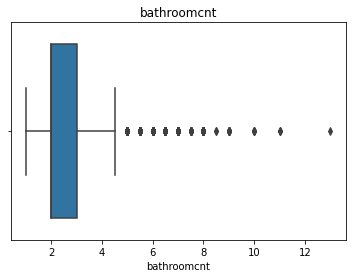

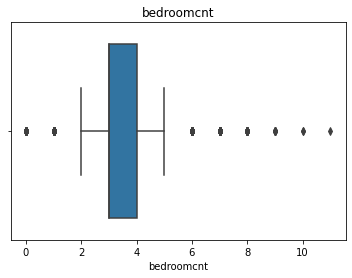

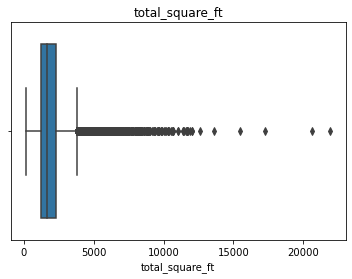

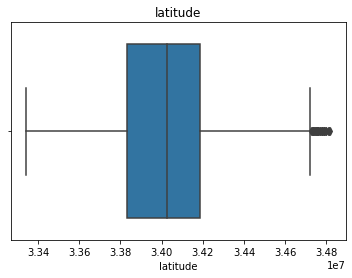

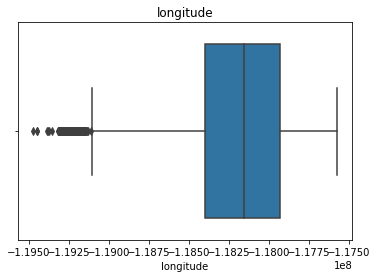

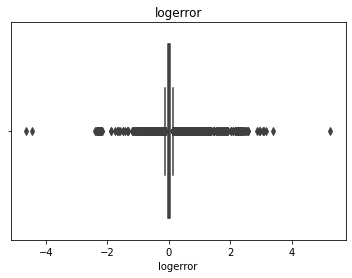

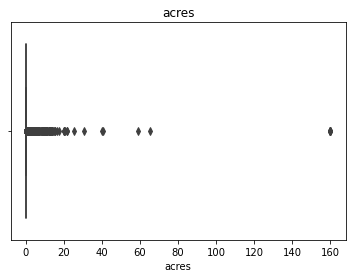

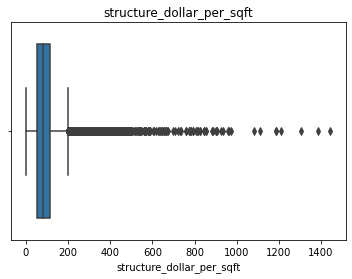

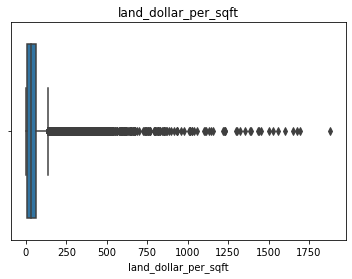

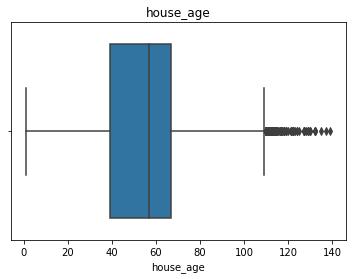

In [10]:
# creating boxplots to look into outliers
for col in cols:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

In [11]:
# Removing the Outliers
zillow_df = prepare.remove_outliers(zillow_df,1.5,cols)

For bathroomcnt the lower bound is 0.5 and  upper bound is 4.5
-----------------
Dataframe now has  49601 rows and  11 columns
For bedroomcnt the lower bound is 1.5 and  upper bound is 5.5
-----------------
Dataframe now has  48610 rows and  11 columns
For total_square_ft the lower bound is -130.5 and  upper bound is 3585.5
-----------------
Dataframe now has  47053 rows and  11 columns
For latitude the lower bound is 33298973.5 and  upper bound is 34726065.5
-----------------
Dataframe now has  47012 rows and  11 columns
For longitude the lower bound is -119083308.5 and  upper bound is -117249798.5
-----------------
Dataframe now has  45494 rows and  11 columns
For logerror the lower bound is -0.1196940426455125 and  upper bound is 0.13260500280398752
-----------------
Dataframe now has  39991 rows and  11 columns
For acres the lower bound is 0.03103191000918272 and  upper bound is 0.28406221303948576
-----------------
Dataframe now has  36194 rows and  11 columns
For structure_dollar

In [12]:
#created acres_bin 
zillow_df['acres_bin'] = pd.cut(zillow_df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200])
#created sqft_bin 
zillow_df['sqft_bin'] = pd.cut(zillow_df.total_square_ft, bins = [0,500, 1500, 2500, 3500, 4500])

In [13]:
# dropping null values.
zillow_df.dropna(inplace = True)

In [14]:
# shape of df after cleaning 33338 records, 17 fields.
zillow_df.shape

(33338, 13)

In [15]:
#splitting the dataset in train, validate and test sets.
train, validate, test = prepare.split_continuous(zillow_df)


train -> (18669, 13)
validate -> (8001, 13)
test -> (6668, 13)


## Main Takeaways:
### - Removed Nan values and dropped columns with <90% non null values. 
### - Created new features and removed features I felt wouldnt be useful.
### - Shape of DF after preparation: 33338 records, 11 fields.
### - Created train, validate, and test datasets.


------------------

# Explore:

In [16]:
train['logerror_bin'] = pd.cut(train.logerror, [-.2, -.05, 0, .05, .2, ])

## Unviariate Exploration:

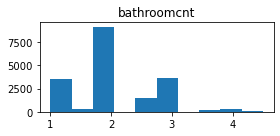

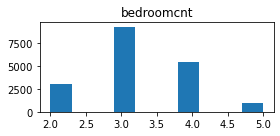

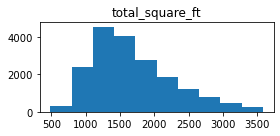

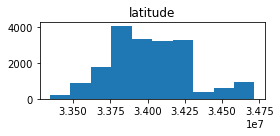

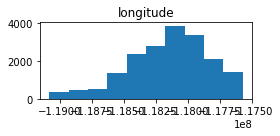

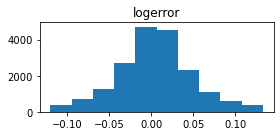

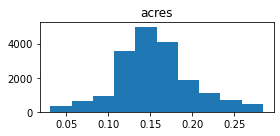

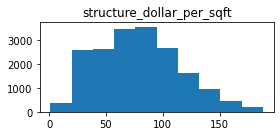

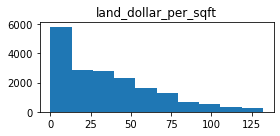

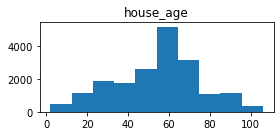

In [17]:
for col in train[cols]:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

## Univariate chart takeaways:
### - Each field appears to be normally distributed, except for bathroomcnt and bedroomcnt.


<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

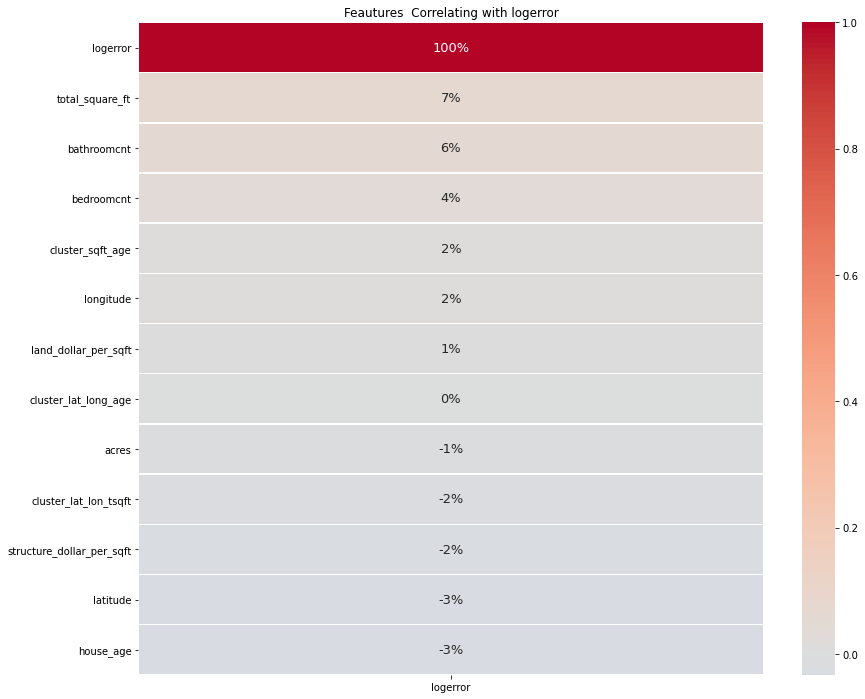

In [58]:
explore.get_heatmap(train,'logerror')

## Heatmap Takeaways:
### - The correlation values are low and indicate weak correlation. Logerror does not correlate well with any of the selected features.

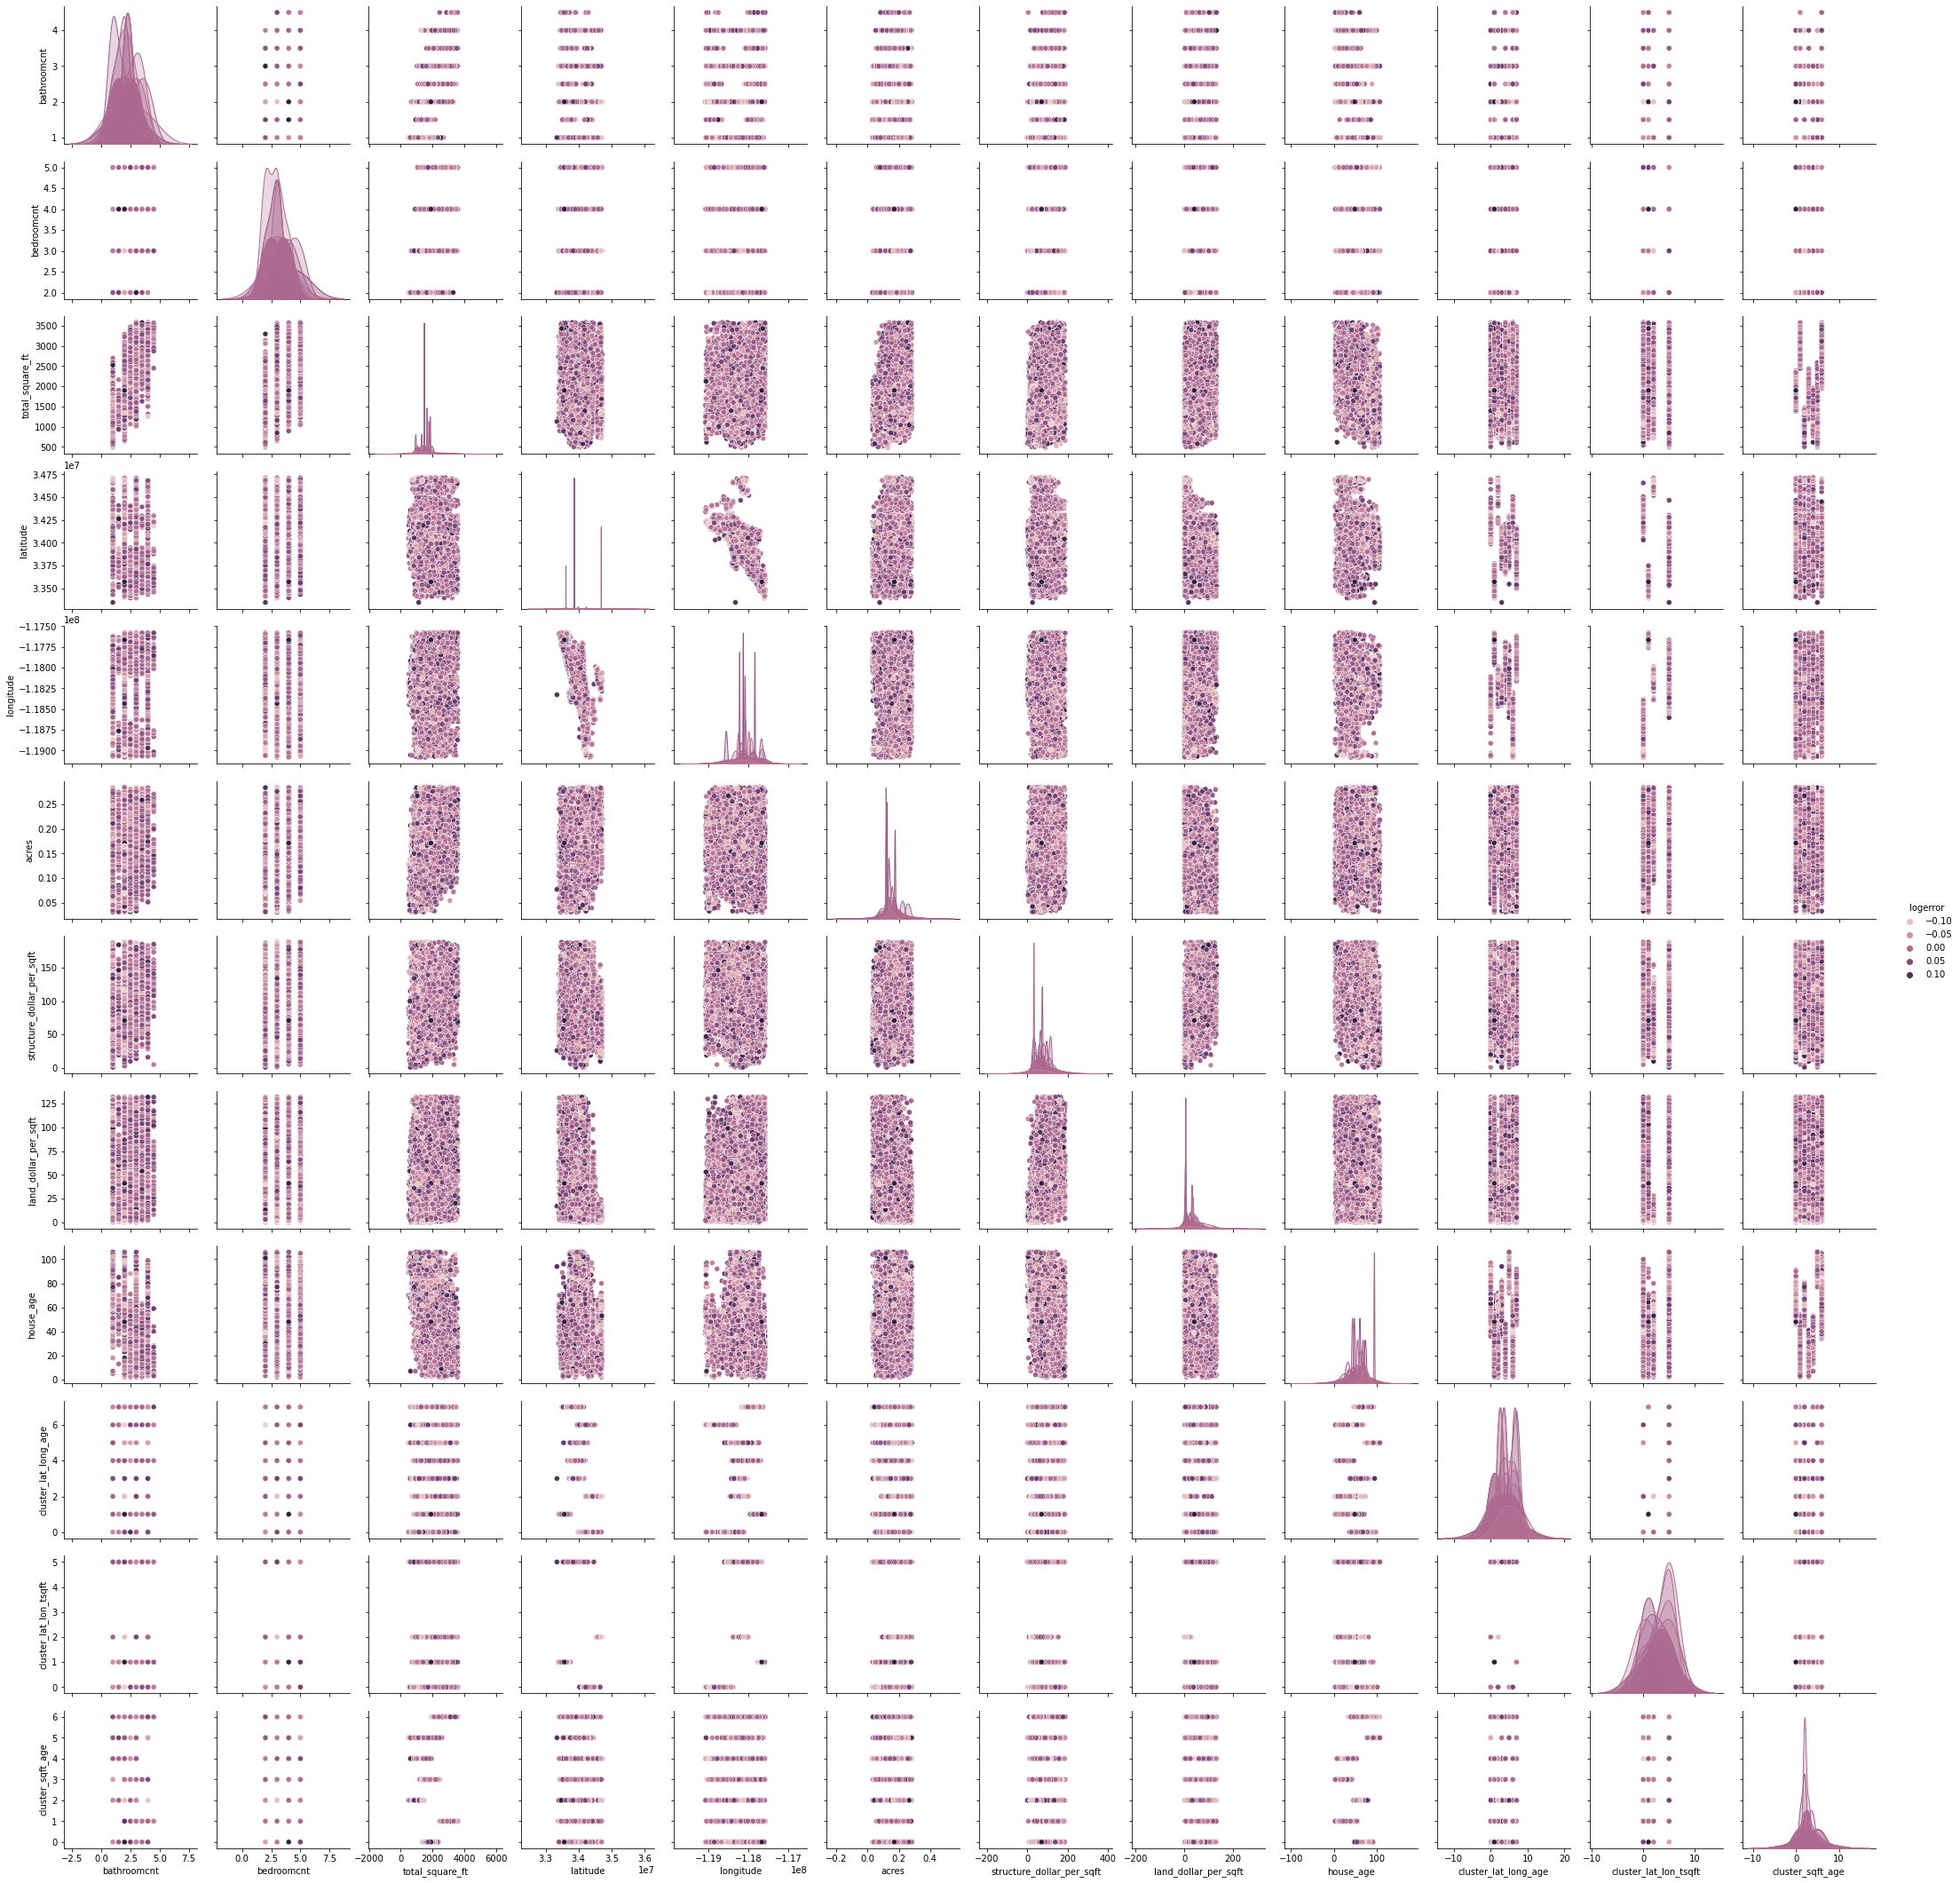

In [59]:
sns.pairplot(data = train, hue = 'logerror')

##  Pairplot Takeaway:
### - Able to see some clusters.

----------

# Statistical Testing: Pre-Clustering

 Pearson correlation coefficient is -0.033225897081289466, the corresponding p value is 5.605311106407713e-06.
 We reject the null, and accept HA, There is a relationship between logerror and house_age.


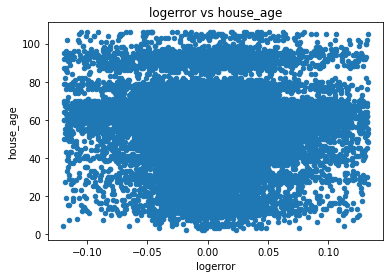

In [18]:
#Pearson Correlation

Null = 'There is no relationship between logerror and house_age'
HA = 'There is a relationship between logerror and house_age'

#define alpha
alpha = 0.05

#utilize pearson r
corr, p = stats.pearsonr(train.house_age, train.logerror)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')

#plotting features on scatter
train.plot.scatter('logerror', 'house_age')
plt.title('logerror vs house_age')

if p < 0.05:
    print(f' We reject the null, and accept HA, {HA}.')
else:
    print(f' We accept null, {Null}.')

 Pearson correlation coefficient is 0.07078644152006999, the corresponding p value is 3.548095423427887e-22.
 We reject the null, and accept HA, There is a relationship between logerror and total_square_ft.


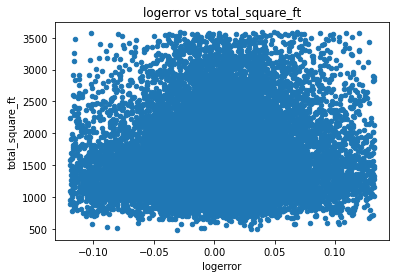

In [19]:
#Pearson Correlation

Null = 'There is no relationship between logerror and total_square_ft'
HA = 'There is a relationship between logerror and total_square_ft'


alpha = 0.05

corr, p = stats.pearsonr(train.total_square_ft, train.logerror)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('logerror', 'total_square_ft')
plt.title('logerror vs total_square_ft')

if p < 0.05:
    print(f' We reject the null, and accept HA, {HA}.')
else:
    print(f' We accept null, {Null}.')

 Pearson correlation coefficient is -0.031253766200265036, the corresponding p value is 1.9450974393143647e-05.
 We reject the null, and accept HA, There is a relationship between logerror and latitude.


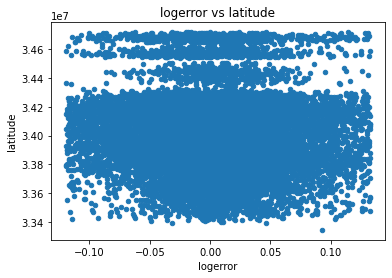

In [20]:
#Pearson Correlation

Null = 'There is no relationship between logerror and latitude'
HA = 'There is a relationship between logerror and latitude'
   
alpha = 0.05

corr, p = stats.pearsonr(train.latitude, train.logerror)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('logerror', 'latitude')
plt.title('logerror vs latitude')

if p < 0.05:
    print(f' We reject the null, and accept HA, {HA}.')
else:
    print(f' We accept null, {Null}.')

In [21]:
#levene HO: equal variance across logerror between bedroomcount less than 3 and greater than 3.
stats.levene(train[train.bedroomcnt <= 3].logerror, train[train.bedroomcnt > 3].logerror)

LeveneResult(statistic=35.78388696215442, pvalue=2.244845700561704e-09)

In [22]:
#TTest 
# make a subset 
x1 = train[train.bedroomcnt <= 3].logerror
x2 = train[train.bedroomcnt > 3].logerror


# run a 2 sample, 2 tail t-test
t_stat, p = stats.ttest_ind(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "There is no significant difference in the logerrors for those who have four or more bedrooms than those who dont."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = -5.1837
p_value = 0.0000

We can reject the null hypothesis that There is no significant difference in the logerrors for those who have four or more bedrooms than those who dont.


In [23]:
#levene HO: equal variance across logerror between total_square_ft <=2500 and greater than 2500.
stats.levene(train[train.total_square_ft <= 2500].logerror, train[train.total_square_ft > 2500].logerror)

LeveneResult(statistic=6.716452914938955, pvalue=0.009560180415598744)

In [24]:
#TTest 
# make a subset 
x1 = train[train.total_square_ft <= 2500].logerror
x2 = train[train.total_square_ft > 2500].logerror


# run a 2 sample, 2 tail t-test
t_stat, p = stats.ttest_ind(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "There is no significant difference in the logerrors for homes with less than 2500 sqrft than homes with greater than."

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = -7.6056
p_value = 0.0000

We can reject the null hypothesis that There is no significant difference in the logerrors for homes with less than 2500 sqrft than homes with greater than.


In [25]:
#levene HO: equal variance across logerror between total_square_ft <=2500 and greater than 2500.
stats.levene(train[train.house_age <= 60].logerror, train[train.house_age > 60].logerror)

LeveneResult(statistic=218.74485722430884, pvalue=3.2273236398735846e-49)

In [26]:
#TTest 
# make a subset 
x1 = train[train.house_age <= 60].logerror
x2 = train[train.house_age > 60].logerror


# run a 2 sample, 2 tail t-test
t_stat, p = stats.ttest_ind(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = "There is no significant difference in the logerrors for homes greater than 60 years old than homes less than 60 years old"

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 5.4278
p_value = 0.0000

We can reject the null hypothesis that There is no significant difference in the logerrors for homes greater than 60 years old than homes less than 60 years old


## Statistical Testing Takeaways:
### - Three Pearson and Three 2-Sample 2-Tailed T-Test.
### - Utilized levene test prior to each TTest to see if variance were the same.
### - For each statistical test the p-value was less than alpha meaning the null hypothesis was rejected for each test.

----------

-----------------

# Exploration: Clustering

### Note: this will be done on unscaled data!

-----------

## Cluster 1

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# will utilize two features
X = train[['latitude', 'longitude', 'house_age']]
Xv = validate[['latitude', 'longitude', 'house_age']]
Xt = test[['latitude', 'longitude', 'house_age']]

In [29]:
#scaling the features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
V_scaled = pd.DataFrame(scaler.transform(Xv), columns= Xv.columns).set_index([Xv.index.values])
T_scaled = pd.DataFrame(scaler.transform(Xt), columns= Xt.columns).set_index([Xt.index.values])

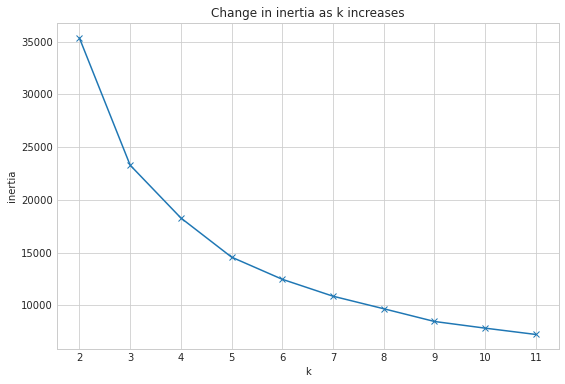

In [30]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [31]:
#Prints out inertia of k
for k in range(2, 12):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

35335.124968017706
23285.19730869029
18283.589204742693
14569.251932348798
12469.423122790433
10868.148724443705
9679.092279179991
8473.901486007213
7840.749720993713
7241.526641036471


In [32]:
#Utilize the kmeans
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X_scaled)
kmeans.fit(V_scaled)
kmeans.fit(T_scaled)
train['cluster_lat_long_age'] = kmeans.predict(X_scaled)
validate['cluster_lat_long_age'] = kmeans.predict(V_scaled)
test['cluster_lat_long_age'] = kmeans.predict(T_scaled)

In [33]:
#scale centroid
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)

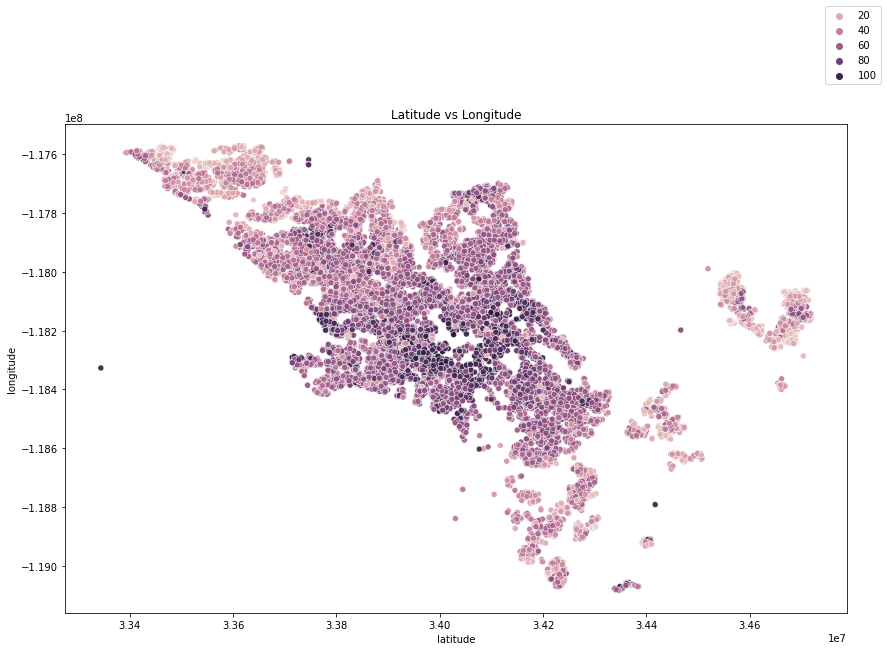

In [34]:
#create scatter plot
plt.figure(figsize=(14, 9))
sns.scatterplot(x= 'latitude', y = 'longitude', data= train, hue='house_age')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.25))
plt.title('Latitude vs Longitude')
plt.show()

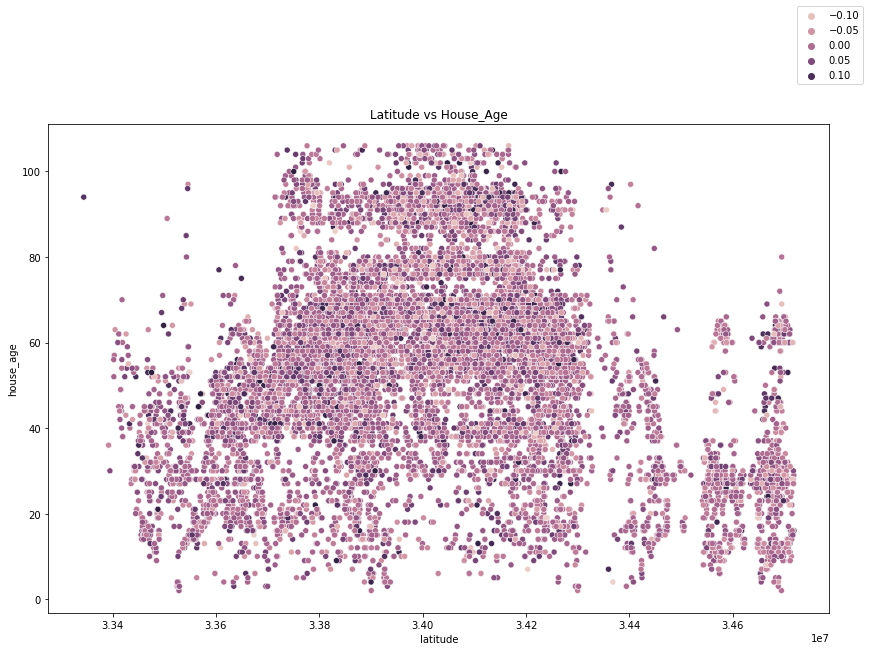

In [35]:
#create scatter plot
plt.figure(figsize=(14, 9))
sns.scatterplot(x= 'latitude', y = 'house_age', data= train, hue='logerror')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.25))
plt.title('Latitude vs House_Age')
plt.show()

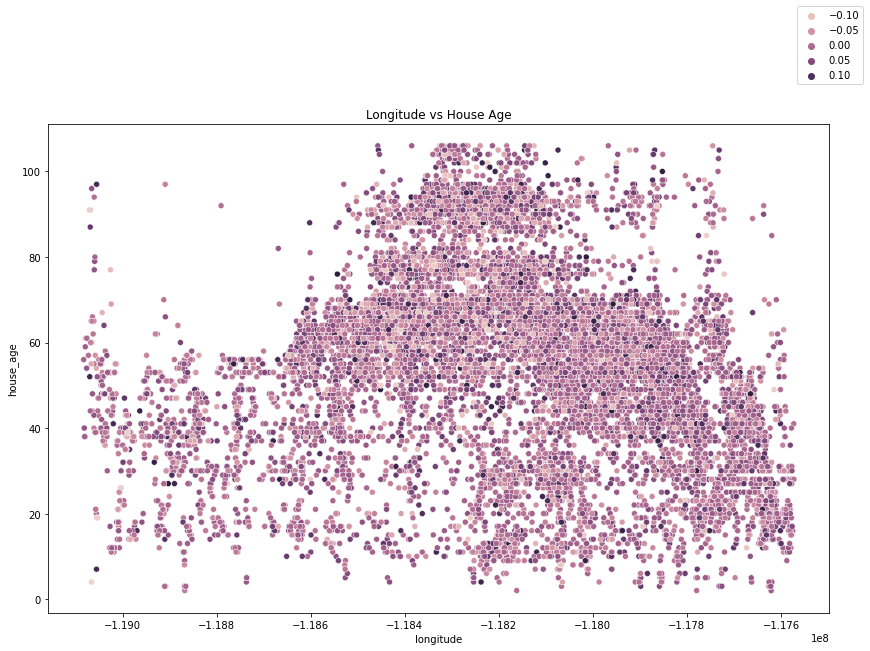

In [36]:
#create scatter plot
plt.figure(figsize=(14, 9))
sns.scatterplot(x= 'longitude', y = 'house_age', data= train, hue='logerror')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.25))
plt.title('Longitude vs House Age')
plt.show()

-----------

---------

## Cluster 2

In [37]:
#utilizing two features
X1 = train[['latitude','longitude', 'total_square_ft']]
V1 = validate[['latitude','longitude', 'total_square_ft']]
T1 = test[['latitude','longitude', 'total_square_ft']]

In [38]:
#scaling th features
scaler = StandardScaler().fit(X1)
X1_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
V1_scaled = pd.DataFrame(scaler.transform(V1), columns= V1.columns).set_index([V1.index.values])
T1_scaled = pd.DataFrame(scaler.transform(T1), columns= T1.columns).set_index([T1.index.values])

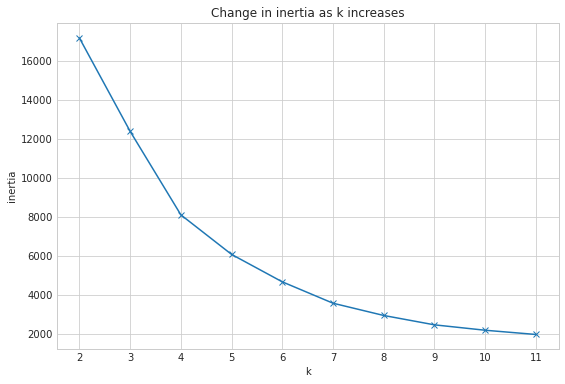

In [39]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    #drop off at 5

In [40]:
#Prints out inertia of k
for k in range(2, 12):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X1_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

17181.159497287954
12399.083083120884
8121.008218224204
6093.842510300716
4688.129607401718
3592.634889645288
2965.967562505167
2485.782261780884
2209.236643876765
1992.6814637578466


In [41]:
#Utilize the kmeans
kmeans = KMeans(n_clusters =6)
kmeans.fit(X1_scaled)
kmeans.fit(V1_scaled)
kmeans.fit(T1_scaled)
train['cluster_lat_lon_tsqft'] = kmeans.predict(X1_scaled)
validate['cluster_lat_lon_tsqft'] = kmeans.predict(V1_scaled)
test['cluster_lat_lon_tsqft'] = kmeans.predict(T1_scaled)


In [42]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X1_scaled.columns)

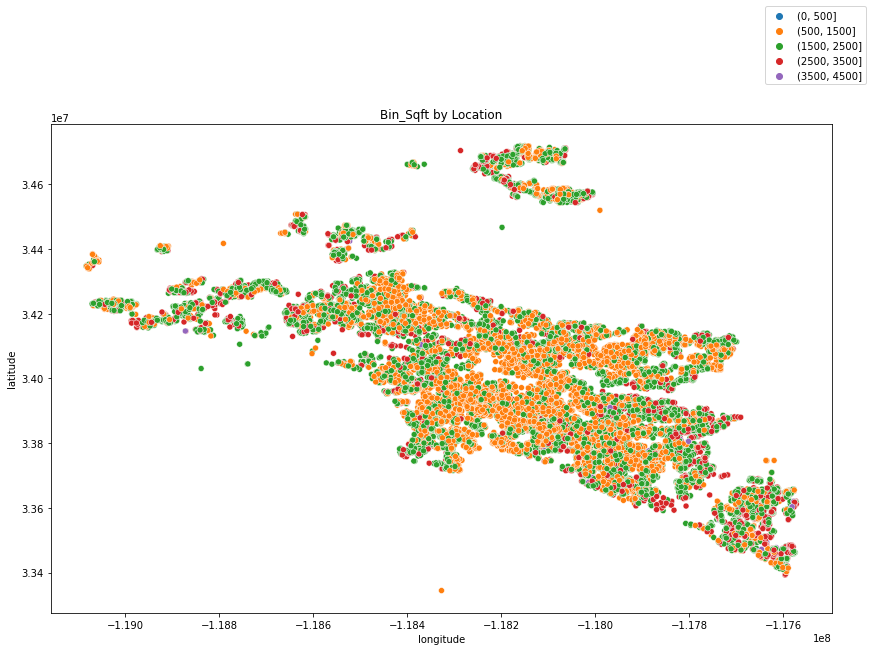

In [43]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x= 'longitude', y = 'latitude', data= train, hue='sqft_bin')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.25))
plt.title('Bin_Sqft by Location')
plt.show()

-------------

-----------

# Cluster 3

In [51]:
X2 = train[['total_square_ft', 'house_age']]
V2 = validate[['total_square_ft', 'house_age']]
T2 = test[['total_square_ft', 'house_age']]
scaler = StandardScaler().fit(X2)
X2_scaled = pd.DataFrame(scaler.transform(X2), columns= X2.columns).set_index([X2.index.values])
V2_scaled = pd.DataFrame(scaler.transform(V2), columns= V2.columns).set_index([V2.index.values])
T2_scaled = pd.DataFrame(scaler.transform(T2), columns= T2.columns).set_index([T2.index.values])

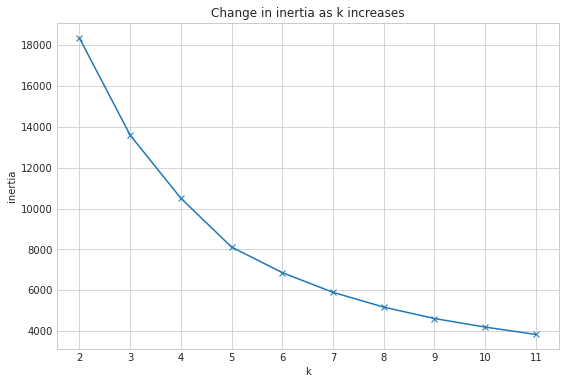

In [52]:
# use elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [53]:
#Prints out inertia of k
for k in range(2, 12):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X2_scaled)
    kmeans.inertia_
    print(kmeans.inertia_)

18352.065580537987
13597.347696993274
10506.673037020408
8119.40297385387
6866.730877968451
5901.240526069588
5178.659975450064
4619.767734794146
4204.680510265057
3841.0872335075983


In [54]:
#Utilize the kmeans
kmeans = KMeans(n_clusters =7)
kmeans.fit(X2_scaled)
kmeans.fit(V2_scaled)
kmeans.fit(T2_scaled)
train['cluster_sqft_age'] = kmeans.predict(X2_scaled)
validate['cluster_sqft_age'] = kmeans.predict(V2_scaled)
test['cluster_sqft_age'] = kmeans.predict(T2_scaled)

In [55]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X2_scaled.columns)

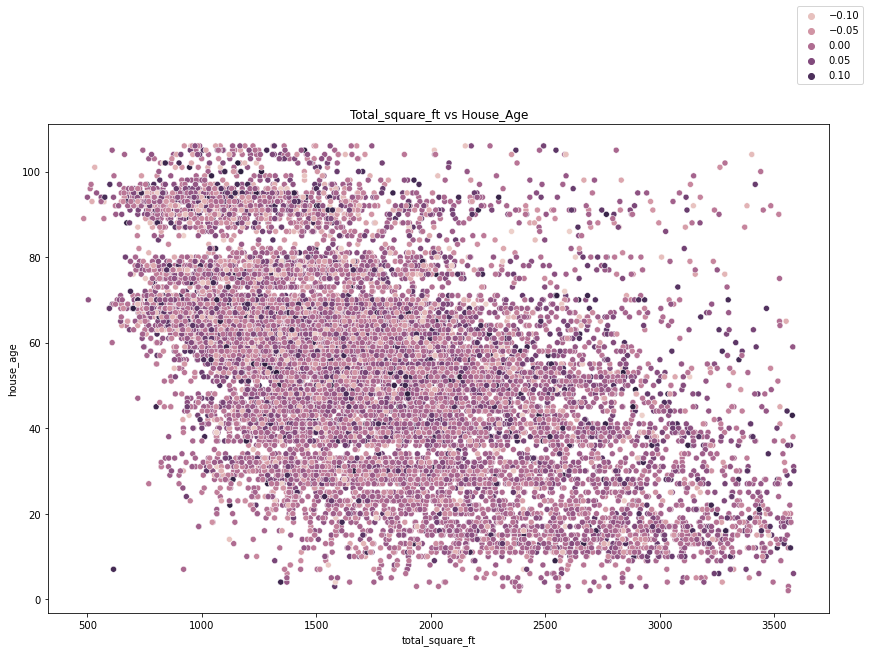

In [56]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='total_square_ft', y = 'house_age',hue = 'logerror' ,data= train)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.25))
plt.title('Total_square_ft vs House_Age')
plt.show()

## Cluster Scatterplot Takeaways:
### - Each scatterplot showed no relationship for logerror.
### - Would like to utilize taxrate with location.
### - Due to time constraint will continue forward.


--------------------

------------------

# Statistical Testing: Clustering

<AxesSubplot:title={'center':'Feautures  Correlating with logerror'}>

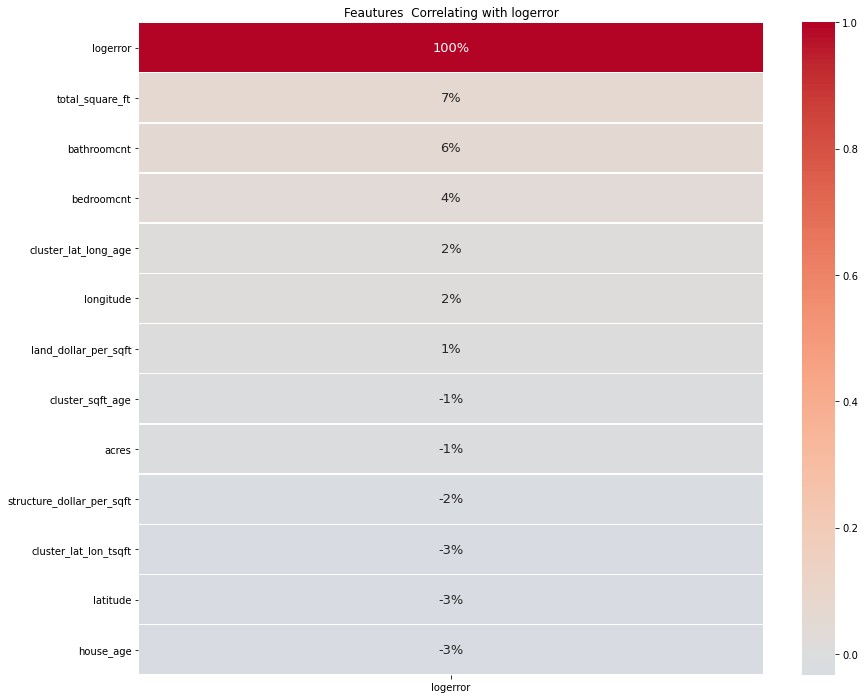

In [57]:
explore.get_heatmap(train, 'logerror')

## HeatMap Takeaways:
### - The new features correlation values are similar to other features. 

------------------------------------

### ANOVA

In [58]:
#creating null hypothesis
null_hypothesis = "log_error mean is the same across all 5 clusters"
alternative_hypothesis = "The log_error mean is different in the clusters"
alpha = 0.05 

In [59]:
cluster0 = train[train.cluster_lat_long_age == 0].logerror
cluster1 = train[train.cluster_lat_long_age == 1].logerror
cluster2 = train[train.cluster_lat_long_age == 2].logerror
cluster3 = train[train.cluster_lat_long_age == 3].logerror
cluster4 = train[train.cluster_lat_long_age == 4].logerror


In [60]:
from scipy.stats import f_oneway

f, p = f_oneway(cluster0, cluster1, cluster2, cluster3, cluster4)
round(f,4), round(p,14)

(7.0277, 1.204752559e-05)

In [61]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    

We reject the null hypothesis that log_error mean is the same across all 5 clusters
We move forward with the alternative hypothesis that The log_error mean is different in the clusters


-------------

### TTEST

In [62]:
null_hypothesis =  'is no difference in the means of the individual clusters logerrors to the population logerror mean.'
alternate_hypothesis = 'is a significant difference in the means of the clusters logerrors.'

In [63]:
clusters_pop_mean = (cluster0.mean() + cluster1.mean() + cluster2.mean() + cluster3.mean()+cluster4.mean()/5)

In [64]:
# compare cluster0 to population
t0, p0 = stats.ttest_1samp(cluster0, clusters_pop_mean)
t0, p0

(-10.730825420733114, 4.3395337115711395e-26)

In [65]:
# compare cluster0 to population
t1, p1 = stats.ttest_1samp(cluster1, clusters_pop_mean)
t1, p1

(-18.407740586251226, 5.420674067976214e-72)

In [66]:
# compare cluster0 to population
t2, p2 = stats.ttest_1samp(cluster2, clusters_pop_mean)
t2, p2

(-13.493601238277224, 4.585350946335768e-39)

In [67]:
# compare cluster0 to population
t3, p3 = stats.ttest_1samp(cluster3, clusters_pop_mean)
t3, p3

(-11.073244842418651, 1.362515698832576e-27)

In [68]:
# compare cluster0 to population
t4, p4 = stats.ttest_1samp(cluster4, clusters_pop_mean)
t4, p4

(-12.68832553602957, 1.8054888706756138e-35)

In [69]:
if (p0 < alpha and p1 < alpha and p2 < alpha and p3 < alpha and p4 < alpha) :
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    

We reject the null hypothesis that is no difference in the means of the individual clusters logerrors to the population logerror mean.
We move forward with the alternative hypothesis that The log_error mean is different in the clusters


# Statisitical Testsing Takeaways:
### - Utilized One sample TTest and ANOVA.
### - Rejected the Null hypothesis for each statistical test.

# Modeling:

In [70]:
cols = ['bedroomcnt', 'total_square_ft','bathroomcnt','cluster_lat_long_age', 'cluster_lat_lon_tsqft', 'latitude', 'longitude']
target = 'logerror'

In [71]:
X_train, y_train = train[cols], train[target]
X_validate, y_validate = validate[cols], validate[target]
X_test, y_test = test[cols], test[target]

## Creating the baseline.

In [72]:
#Convert y_train and y_validate to dataframes to append the new columns with predicted values 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#Predict log_error_pred_mean
logerror_pred_mean = y_train['logerror'].mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

#Compute log_error_pred_median
logerror_pred_median = y_train['logerror'].median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

In [73]:
#Evaluate the baseline model using the mean
#RMSE of log_error_pred_mean
baseline_RMSE = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** .5
baseline_val_RMSE = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean) ** .5

print("RMSE using Mean\nTrain/In-Sample: ", round(baseline_RMSE, 3),
      "\nValidate/Out-of-Sample: ", round(baseline_val_RMSE, 3))

#Evaluate the baseline model using the median
#RMSE of log_error_pred_mean
baseline_rmse_train_median = mean_squared_error(y_train.logerror, y_train.logerror_pred_median) ** .5
baseline_rmse_validate_median = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median) ** .5

print("RMSE using Median\nTrain/In-Sample: ", round(baseline_rmse_train_median, 3), 
      "\nValidate/Out-of-Sample: ", round(baseline_rmse_validate_median, 3))

RMSE using Mean
Train/In-Sample:  0.045 
Validate/Out-of-Sample:  0.045
RMSE using Median
Train/In-Sample:  0.045 
Validate/Out-of-Sample:  0.045


## Baseline Takeaways:
### - Mean and median values are equal, will set baseline to logerror mean. 

### OLS Linear Regression Model

In [74]:
# create the model object
lm = LinearRegression(normalize=True,)

# fit the model to our training data
lm.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm) ** (1/2)


# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train,3),
      "\nValidation/Out-of-Sample: ", round(rmse_validate,3),
     "\nBaseline RMSE value is ", round(baseline_RMSE,3))
evs_lm = explained_variance_score(y_train.logerror, y_train.logerror_pred_lm)
print('Explained Variance Polynomial Model = ', round(evs_lm,3))

RMSE for OLS using LinearRegression
Training/In-Sample:  0.045 
Validation/Out-of-Sample:  0.045 
Baseline RMSE value is  0.045
Explained Variance Polynomial Model =  0.006


## Polynomial Regression Model

In [75]:
# make the polynomial features to get a new set of features
poly_feat = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = poly_feat.fit_transform(X_train)

# transform X_validate & X_test
X_validate_degree3 = poly_feat.transform(X_validate)
X_test_degree2 = poly_feat.transform(X_test)

y_test.shape, X_test.shape, X_test_degree2.shape

((6668,), (6668, 7), (6668, 36))

In [76]:
# create the model object
linear_model2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
linear_model2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_predict_linear_model2'] = linear_model2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_poly = mean_squared_error(y_train.logerror, y_train.logerror_predict_linear_model2)**(1/2)

# predict validate
y_validate['logerror_predict_linear_model2'] = linear_model2.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate_poly = mean_squared_error(y_validate.logerror, y_validate.logerror_predict_linear_model2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", round(rmse_train_poly,3), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate_poly,3), 
      "\nBaseline RMSE value is ", round(baseline_RMSE,3))
evs_poly = explained_variance_score(y_train.logerror, y_train.logerror_predict_linear_model2)
print('Explained Variance Polynomial Model = ', round(evs_poly,3))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.044 
Validation/Out-of-Sample:  0.052 
Baseline RMSE value is  0.045
Explained Variance Polynomial Model =  0.009


## Lasso Lars

In [77]:
# create the model object
lars_model = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars_model.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_prediction_lars'] = lars_model.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_prediction_lars)**(1/2)

# predict validate
y_validate['logerror_prediction_lars'] = lars_model.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_prediction_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train_lars,3), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate_lars,3),
      "\nBaseline RMSE value is ", round(baseline_RMSE,3))
evs_lars = explained_variance_score(y_train.logerror, y_train.logerror_prediction_lars)
print('Explained Variance Linear Regression Model = ', round(evs_lars,3))

RMSE for Lasso + Lars
Training/In-Sample:  0.045 
Validation/Out-of-Sample:  0.045 
Baseline RMSE value is  0.045
Explained Variance Linear Regression Model =  0.0


## Tweedie Regressor

In [78]:
# create the model object
glm = TweedieRegressor(alpha=0, power = 0)

# fit the model to our training data. 
glm.fit(X_train, y_train.logerror)


# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm) ** (1/2)


# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", round(rmse_train,3), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,3),
     "\nBaseline RMSE value is ", round(baseline_RMSE,3))
evs_glm = explained_variance_score(y_train.logerror, y_train.logerror_pred_glm)
print('Explained Variance Linear Regression Model = ', round(evs_glm,3))

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  0.045 
Validation/Out-of-Sample:  0.045 
Baseline RMSE value is  0.045
Explained Variance Linear Regression Model =  0.006


## Modeling Takeaways:
### - Each model performed the same as the baseline. So none of the models are valid.
### - Going to utilize OLS linear regression model to evaluate test dataset.

-------------------

## Evaluate on Test

In [79]:
# create the model object
# predict train
# create dataframe
y_test = pd.DataFrame(y_test)

# predict train
y_test['logerror_pred_poly'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_poly) ** (1/2)


print("\nTest/Out-of-Sample: ", round(rmse_test,3),
      "\nBaseline RMSE value is ", round(baseline_RMSE,3))
evs_test = explained_variance_score(y_test.logerror, y_test.logerror_pred_poly)
print('Explained Variance Polynomial Model = ', round(evs_test,3))


Test/Out-of-Sample:  0.044 
Baseline RMSE value is  0.045
Explained Variance Polynomial Model =  0.008


----------

# Conclusion

### Each model performed the same as the baseline.

### Decided to use OLS regression model, the test performed better by .001%.





### With more time:
#### - Would like to find better predictors of log error.
#### - Would like to explore 3 dimensional clustering, really look more into utilizing location with other features.
#### - Would like to utilize imputing to fill missing data.
